# Setting

In [1]:
source("~/works/utils/r/myutils.r")

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



# my.figsize
- change plot size

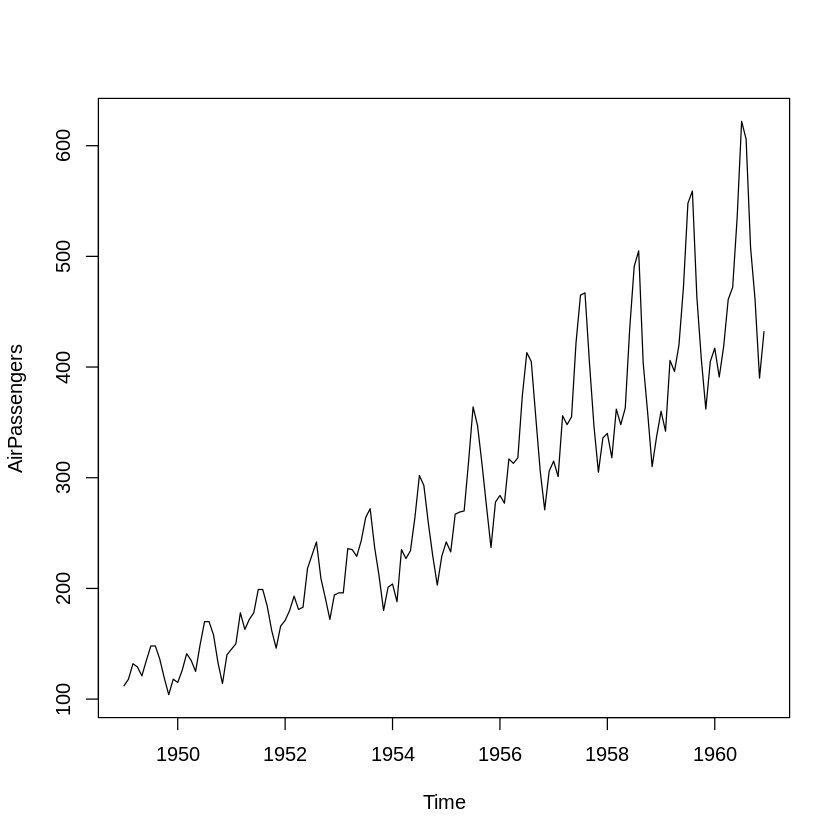

In [12]:
plot(AirPassengers)

In [3]:
my.figsize()

[1] "width: 7, height 7"

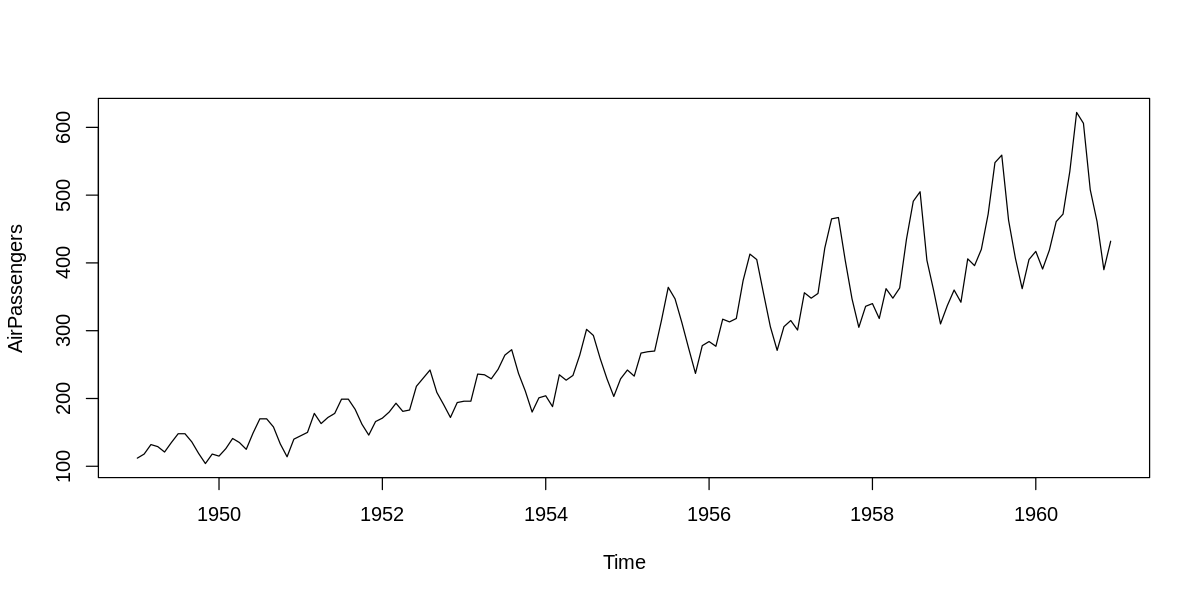

In [2]:
my.figsize(10,5)
plot(AirPassengers) 

# my.plot_forecast

In [56]:
#install.packages('forecast')
#install.packages('ggplot2')
library(forecast)
library(ggplot2)

In [4]:
attributes(AirPassengers)

$tsp
[1] 1949.000 1960.917   12.000

$class
[1] "ts"

In [16]:
start_train  <- c(1949, 1)
end_train  <- c(1955, 12)
start_test <- c(1956, 1)
end_test   <- c(1956, 12)

train <- window(AirPassengers, start=start_train, end=end_train)
test <- window(AirPassengers, start=start_test, end=end_test)

In [17]:
fit <- auto.arima(train, trace=FALSE)

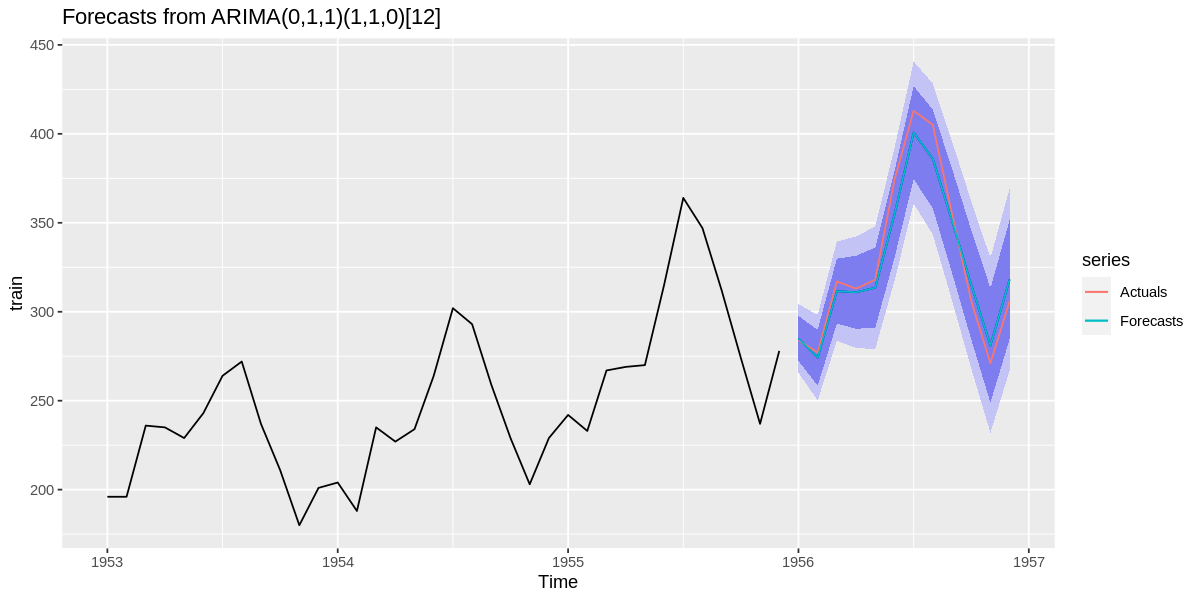

In [18]:
future <- length(test)
past <- 3*future

my.plot_forecast(fit, future, past, test=test)

# my.tsCV
modified from following:
- https://stats.stackexchange.com/questions/431545/why-isnt-the-tscv-function-allowing-for-step-size-other-than-1

In [2]:
library(forecast)
library(ggplot2)
library(gridExtra)

In [3]:
set.seed(5)

In [4]:
cv.forecast <- function(x, h) {
    forecast(auto.arima(x, trace=FALSE), h=h)
}

In [5]:
h <- 12
w <- 7*12
step <- 3

result <- my.tsCV(AirPassengers, cv.forecast, h=h, window=w, step=step)

[1] "5 % done."
[1] "10 % done."
[1] "15 % done."
[1] "20 % done."
[1] "25 % done."
[1] "30 % done."
[1] "35 % done."
[1] "40 % done."
[1] "45 % done."
[1] "50 % done."
[1] "55 % done."
[1] "60 % done."
[1] "65 % done."
[1] "70 % done."
[1] "75 % done."
[1] "80 % done."
[1] "85 % done."
[1] "90 % done."
[1] "95 % done."
[1] "100 % done."


In [23]:
my.figsize(10,5)

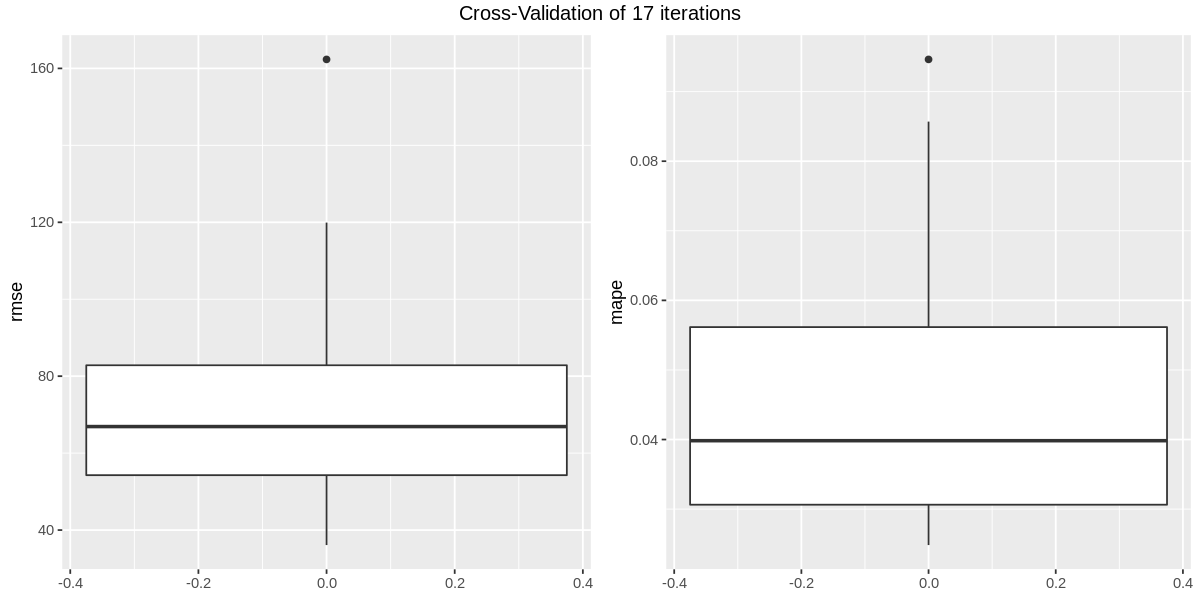

In [35]:
x <- result
x <- x[,c('rmse','mape')]
x <- as.data.frame(x)
x <- na.omit(x)

title <- paste('Cross-Validation of', nrow(x), 'iterations')
g1 <- ggplot(x, aes(y=rmse)) + geom_boxplot()
g2 <- ggplot(x, aes(y=mape)) + geom_boxplot()
grid.arrange(g1, g2, nrow=1, top=title)

# my.minmaxscale

In [2]:
library(xts)
library(ggplot2)
library(gridExtra)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [3]:
start_train  <- c(1949, 1)
end_train  <- c(1955, 12)

train <- window(AirPassengers, start=start_train, end=end_train)

In [4]:
trainx <- as.xts(train)
index(trainx) <- as.Date(format(index(trainx), "%Y-%m-%d"))

trainx.scaled <- my.minmaxscale(trainx)

In [5]:
trainx.inv <- my.minmaxscale(trainx.scaled)

In [6]:
colnames(trainx) <- 'base'
colnames(trainx.scaled) <- 'scaled'
colnames(trainx.inv) <- 'inv_scaled'

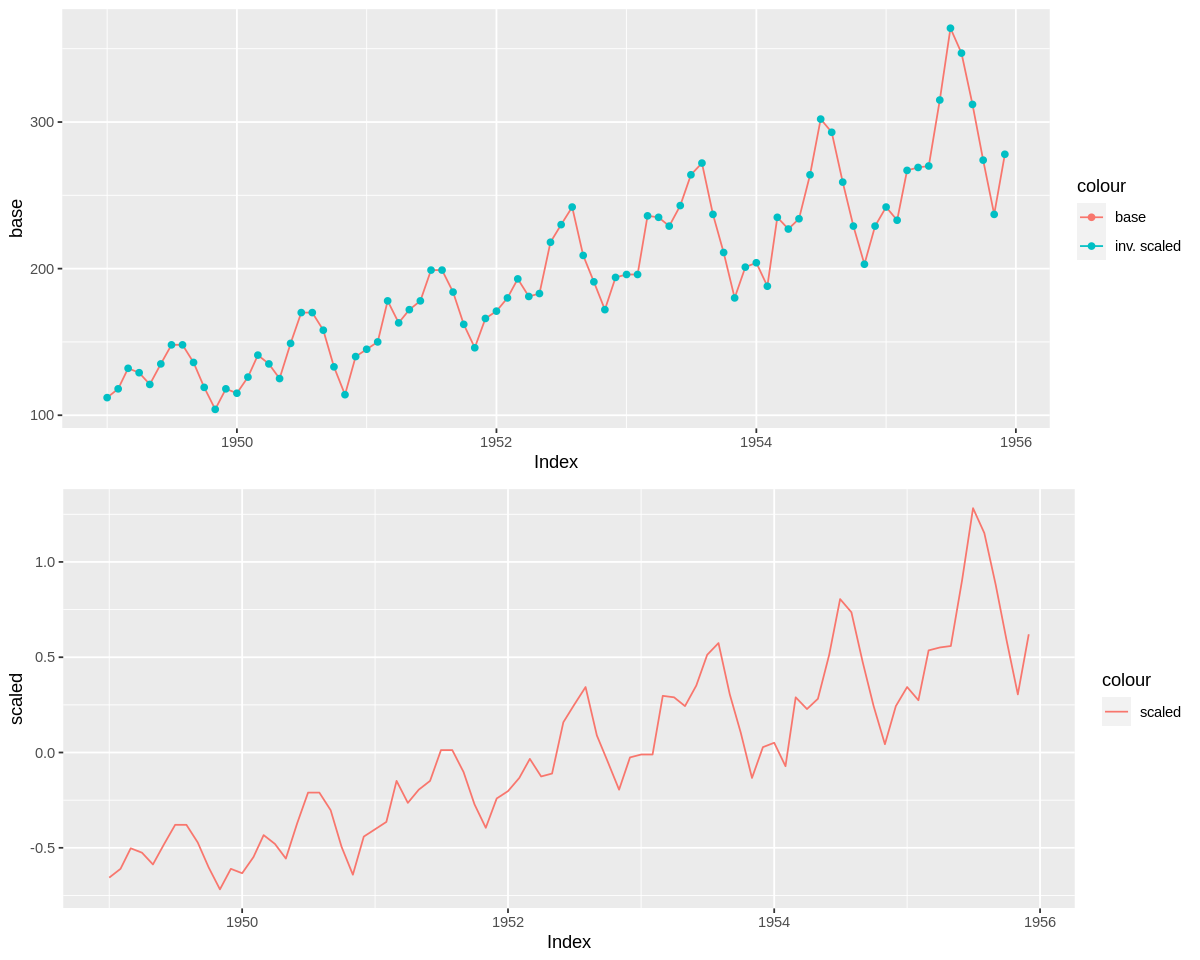

In [7]:
my.figsize(10,8)
y <- merge(trainx, trainx.inv)
g1 <- (ggplot(y, aes(x=Index, y=base, color='base')) + geom_line()
       + geom_point(data=y, aes(x=Index, y=trainx.inv, color='inv. scaled'))
      # + theme(legend.position = c(0, 1))
      )
g2 <- ggplot(trainx.scaled, aes(x=Index, y=scaled, color='scaled')) + geom_line()
grid.arrange(g1, g2, nrow=2)

# my.recprice

In [10]:
library(quantmod)

Loading required package: TTR



In [36]:
start <- "2020-01-01"
end <- "2020-12-31"
getSymbols("^GSPC", from=start, to=end)

spClose <- Cl(GSPC)

[1] "^GSPC"

## 1-Day Return

In [47]:
lookahead <- 1
spLogReturns <- diff(log(spClose), lookahead)
spLogReturns[as.character(head(index(spClose),lookahead))] <- 0

In [48]:
spClose.recovered <- my.recprice(spLogReturns, lookahead, spClose)

In [49]:
colnames(spClose) <- 'close'
colnames(spLogReturns) <- 'log_return'
colnames(spClose.recovered) <- 'close_recovered'

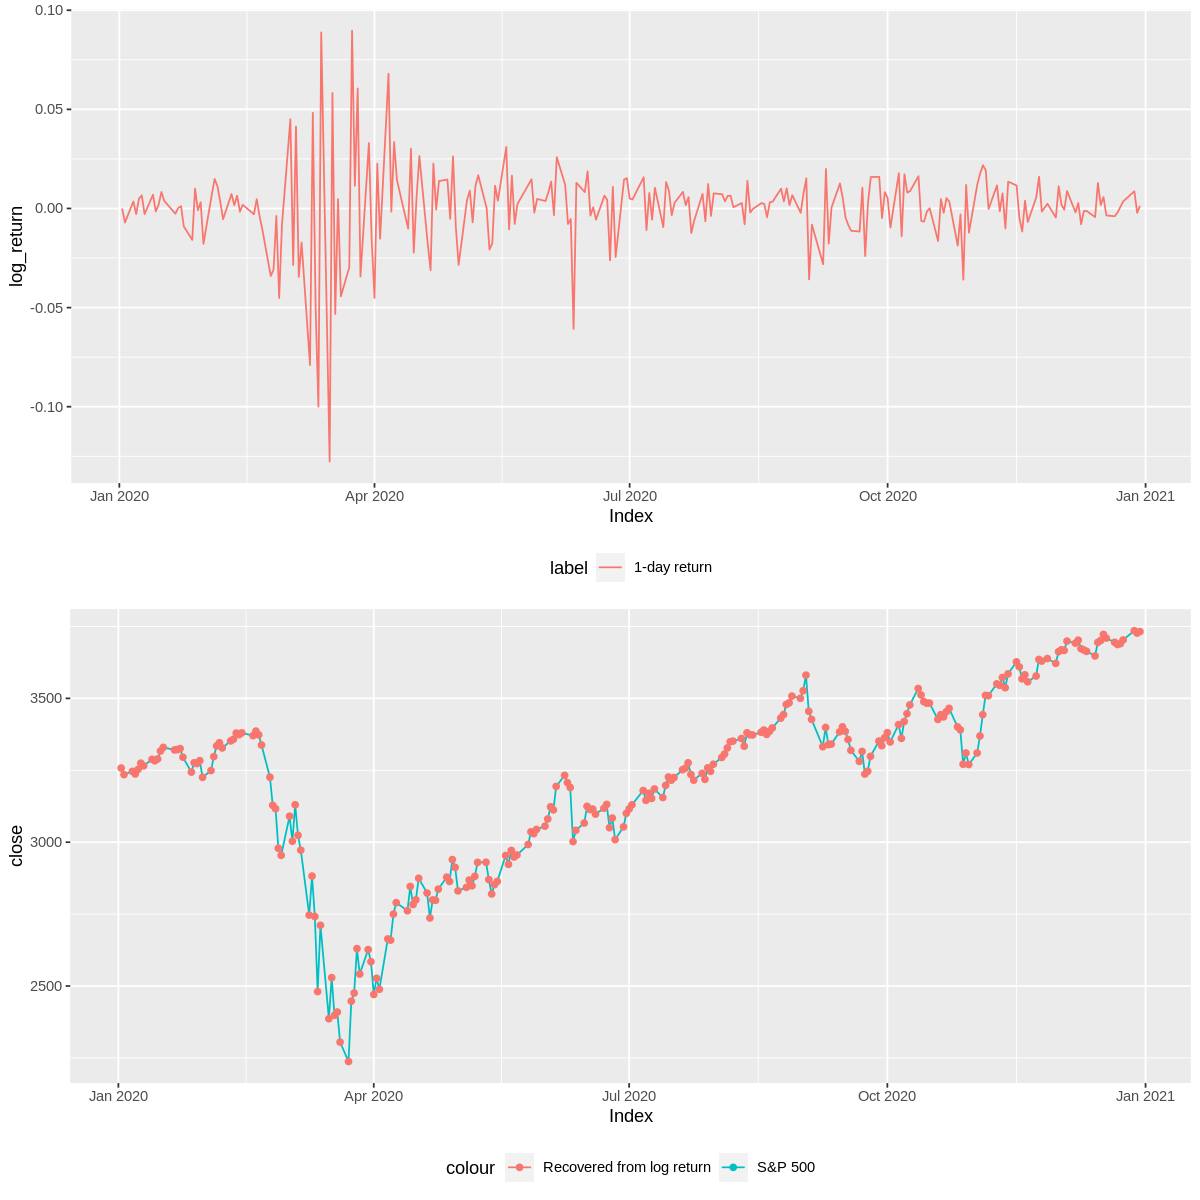

In [50]:
my.figsize(10,10)

y <- merge(spClose, spClose.recovered)
g1 <- (ggplot(y, aes(x=Index, y=close, color='S&P 500')) + geom_line()
       + geom_point(data=y, aes(x=Index, y=close_recovered, color='Recovered from log return'))
       + theme(legend.position = 'bottom')
      )

label = paste(lookahead, '-day return', sep='')
g2 <- (ggplot(spLogReturns, aes(x=Index, y=log_return, color=label)) + geom_line()
        + theme(legend.position = 'bottom'))
grid.arrange(g2, g1, nrow=2, top=title)

## 5-Day Return

In [42]:
lookahead <- 5
spLogReturns <- diff(log(spClose), lookahead)
spLogReturns[as.character(head(index(spClose),lookahead))] <- 0

spClose.recovered <- my.recprice(spLogReturns, lookahead, spClose)

colnames(spClose) <- 'close'
colnames(spLogReturns) <- 'log_return'
colnames(spClose.recovered) <- 'close_recovered'

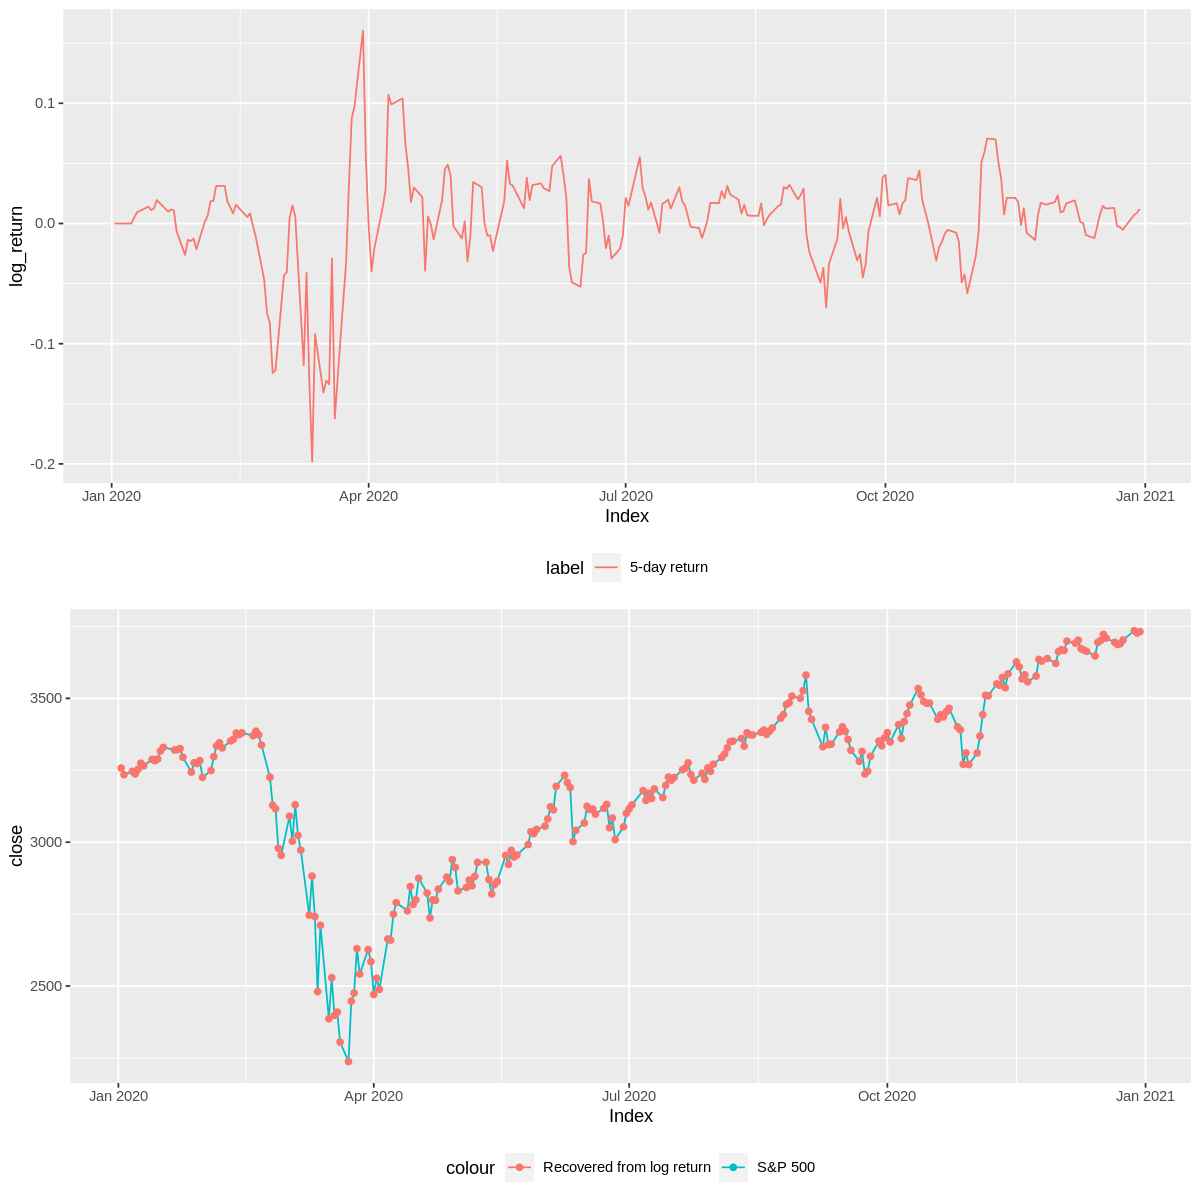

In [46]:
my.figsize(10,10)

y <- merge(spClose, spClose.recovered)
g1 <- (ggplot(y, aes(x=Index, y=close, color='S&P 500')) + geom_line()
       + geom_point(data=y, aes(x=Index, y=close_recovered, color='Recovered from log return'))
       + theme(legend.position = 'bottom')
      )

label = paste(lookahead, '-day return', sep='')
g2 <- (ggplot(spLogReturns, aes(x=Index, y=log_return, color=label)) + geom_line()
        + theme(legend.position = 'bottom'))
grid.arrange(g2, g1, nrow=2, top=title)